In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

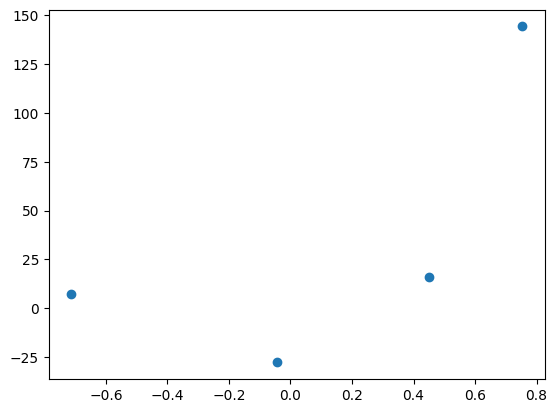

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [4]:
# lets apply OLS
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [6]:
reg.coef_  # slope

array([78.35063668])

In [7]:
reg.intercept_

26.15963284313262

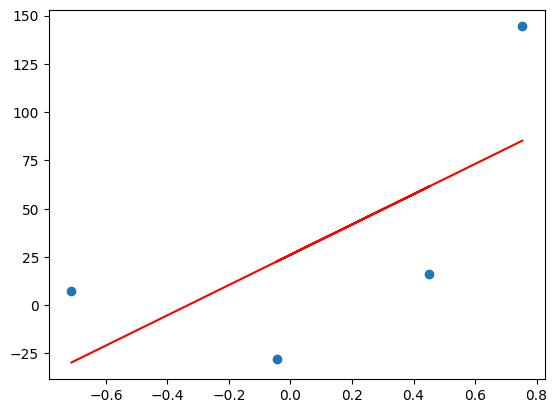

In [8]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')

In [9]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's apply the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0).reshape(4)

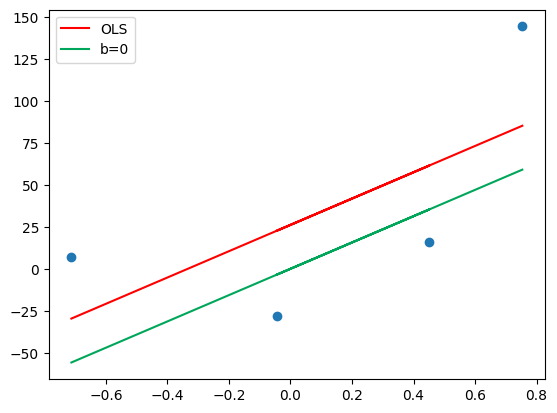

In [10]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='#00a65a', label='b=0')
plt.legend()
plt.show()

In [11]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-209.27763408209216

In [12]:
# Lets take learning rate = 0.1
lr = 0.1 

step_size = loss_slope*lr
step_size

-20.927763408209216

In [13]:
# calculating the new intercept
b = b - step_size
b

20.927763408209216

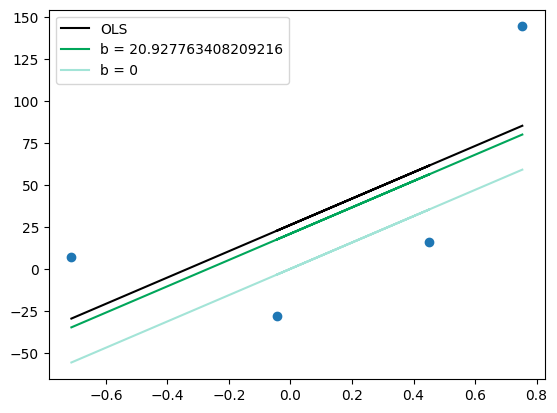

In [14]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='black', label='OLS')
plt.plot(X, y_pred1, color='#00a65a', label='b = {}'.format(b))
plt.plot(X, y_pred, color='#A3E4D7', label='b = 0')
plt.legend()
plt.show()

In [15]:
# itearation 2
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-41.85552681641843

In [16]:
step_size = loss_slope * lr
step_size

-4.185552681641844

In [17]:
b = b - step_size
b

25.11331608985106

In [18]:
y_pred2 = ((78.35 * X) + b).reshape(4)

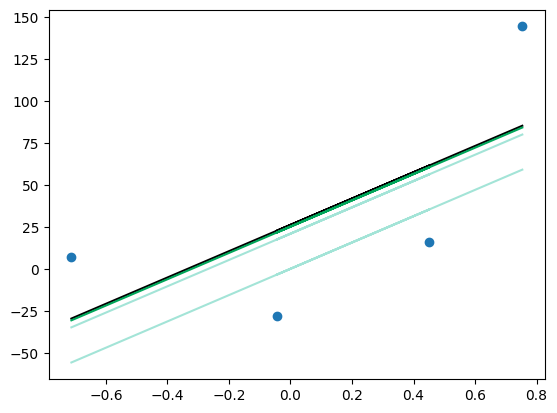

In [19]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='black', label='OLS')
plt.plot(X, y_pred2, color='#00a65a', label='b = {}'.format(b))
plt.plot(X, y_pred1, color='#A3E4D7', label='b = {}'.format(b))
plt.plot(X, y_pred, color='#A3E4D7', label='b = 0')

In [20]:
# iteration 3
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-8.371105363283675

In [21]:
step_size = loss_slope * lr
step_size

-0.8371105363283675

In [22]:
b = b - step_size
b

25.95042662617943

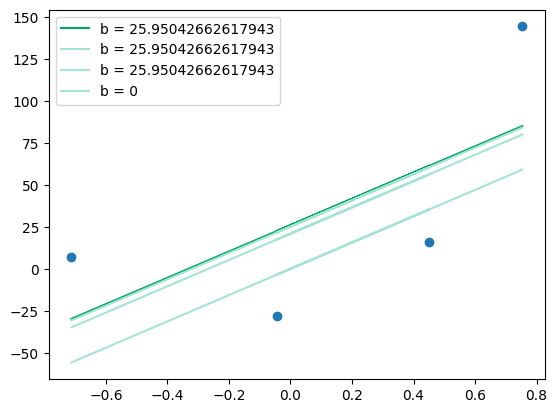

In [23]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, y_pred3, color='#00a65a', label='b = {}'.format(b))
plt.plot(X, y_pred2, color='#A3E4D7', label='b = {}'.format(b))
plt.plot(X, y_pred1, color='#A3E4D7', label='b = {}'.format(b))
plt.plot(X, y_pred, color='#A3E4D7', label='b = 0')
plt.legend()
plt.show()

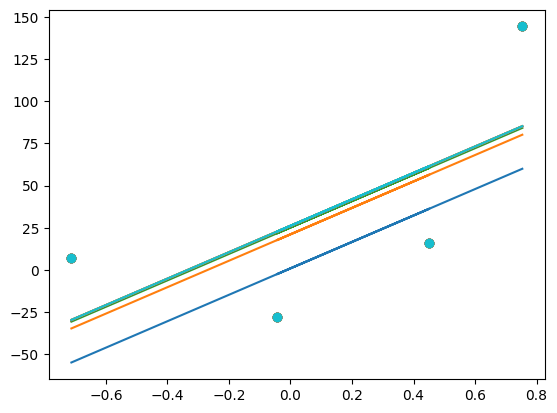

In [24]:
# looping all this content, to reduce the number of steps required to write the code
b = -100
m = 78.35
lr = 0.1 # it sets the steps taken by process to reach the slope value, low lr (learning rate) means small steps will be taken , high lr means big steps will be taken

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    
    b = b - (lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X, y_pred)

    plt.scatter(X, y)


## Creating Our Own Class of GD Regressior

In [11]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [12]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

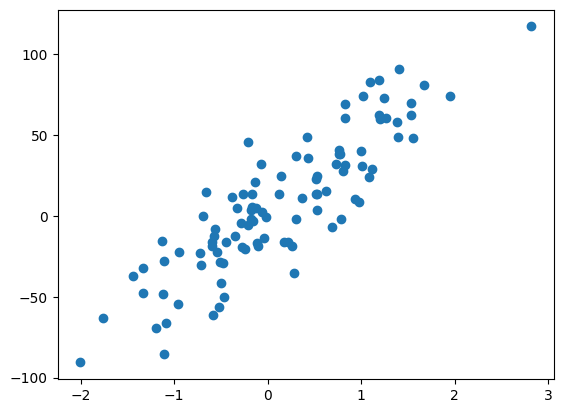

In [13]:
plt.scatter(X, y)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[40.89638569]
2.1245018519881373


In [17]:
m = 29.19

In [18]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope, self.b)

        print(self.b)
            

In [25]:
gd = GDRegressor(0.001, 100)

In [26]:
gd.fit(X, y)

-24751.559006810563 -95.24844099318943
-19801.24720544845 -75.44719378774099
-15840.997764358757 -59.606196023382225
-12672.798211487006 -46.93339781189522
-10138.238569189603 -36.795159242705616
-8110.590855351683 -28.684568387353934
-6488.472684281348 -22.196095703072587
-5190.778147425077 -17.00531755564751
-4152.622517940063 -12.852695037707445
-3322.098014352049 -9.530597023355396
-2657.6784114816396 -6.872918611873756
-2126.142729185312 -4.7467758826884445
-1700.9141833482497 -3.045861699340195
-1360.7313466785993 -1.6851303526615957
-1088.5850773428797 -0.5965452753187159
-870.8680618743037 0.27432278655558784
-696.694449499443 0.9710172360550308
-557.3555595995542 1.528372795654585
-445.8844476796436 1.9742572433342285
-356.70755814371466 2.3309648014779434
-285.36604651497174 2.616330847992915
-228.2928372119775 2.8446236852048927
-182.63426976958175 3.0272579549744743
-146.10741581566572 3.17336537079014
-116.88593265253252 3.2902513034426724
-93.50874612202587 3.383760049564